# I. Numpy

### Импортируйте NumPy

In [12]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [13]:
# df = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
# print(df)
# df = df.reshape(1, df.size)
# print(df)

df = np.zeros(10, dtype=int)
df[4] = 1
df = df.reshape(1, df.size)
df

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [14]:
df = np.arange(10, 50)
df = np.flip(df)
# df = [i for i in df if i % 2 == 0]
df = df[df % 2 == 0]
df

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [15]:
df = np.arange(0, 9).reshape(3, 3)
df

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [16]:
df = np.random.randint(10, size=(4, 3, 2))
f"max: {np.max(df)}, min: {np.min(df)}"

'max: 9, min: 1'

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [17]:
df1 = np.random.randint(10, size=(6, 4))
df2 = np.random.randint(10, size=(4, 3))
df3 = np.dot(df1, df2)
df3

array([[ 85,  44,  52],
       [102,  60,  64],
       [ 71,  33,  65],
       [ 62,  49,  49],
       [ 95,  65,  66],
       [150,  96, 112]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [18]:
df = np.random.randint(10, size=(7, 7))
df
res = (df - df.std()) / df.mean()
res

array([[-0.60006153,  1.21475329,  0.60981502,  1.0131072 ,  0.81146111,
        -0.19676935,  0.00487674],
       [-0.60006153, -0.39841544,  0.81146111,  0.40816893,  1.0131072 ,
        -0.19676935, -0.60006153],
       [ 1.21475329,  1.21475329,  0.81146111,  0.81146111,  0.20652283,
         0.40816893,  0.00487674],
       [-0.19676935,  0.81146111, -0.39841544,  1.21475329,  1.21475329,
         0.60981502, -0.19676935],
       [ 1.0131072 ,  0.20652283, -0.19676935,  0.40816893,  0.20652283,
         1.21475329,  0.20652283],
       [ 0.00487674,  1.21475329, -0.60006153, -0.39841544,  1.21475329,
         0.20652283,  0.60981502],
       [-0.19676935,  0.00487674,  0.40816893,  0.81146111,  1.0131072 ,
         0.00487674,  1.21475329]])

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузите датасет Tips из набора датасетов seaborn

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

### Посмотрите на первые 5 строчек

In [21]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [22]:
df.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [36]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [37]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [38]:
#df.iloc[:, [0, 1, -1]]
df[["total_bill", "tip", "size"]]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### Найдите максимальное значение 'total_bill'

In [39]:
df["total_bill"].max()

50.81

### Найдите количество курящих людей

In [40]:
smoker = len(df[df["smoker"] == "Yes"])
smoker

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [41]:
df.groupby("day")["total_bill"].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [42]:
greater_than_median = df.loc[df["total_bill"] > df["total_bill"].median()]
mean_greater_than_median = greater_than_median.groupby("sex")["tip"].mean()

In [43]:
greater_than_median

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [44]:
mean_greater_than_median

sex
Female    3.663939
Male      3.756404
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [46]:
df = df.replace({"smoker": {"Yes": 1, "No": 0}})
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: xlabel='total_bill'>

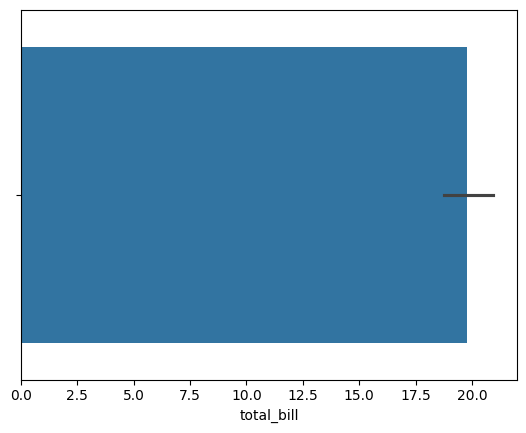

In [63]:
sns.barplot(data=df, x="total_bill")

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

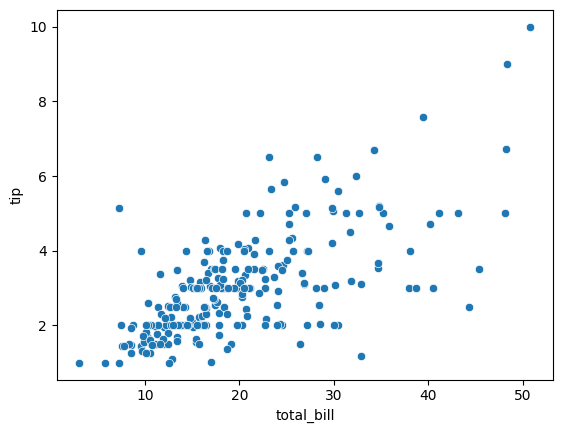

In [50]:
sns.scatterplot(data=df, x="total_bill", y="tip")

### Постройте pairplot

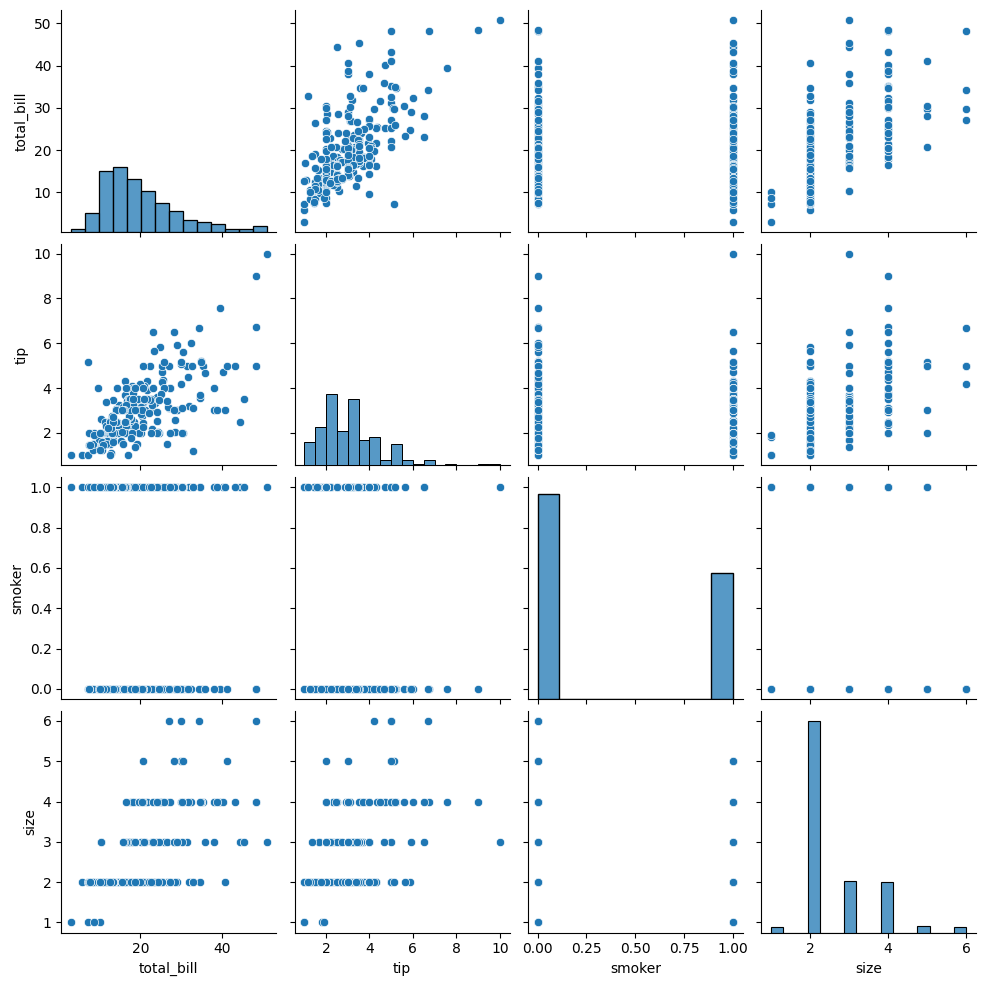

In [52]:
sns.pairplot(df)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<Axes: xlabel='day', ylabel='total_bill'>

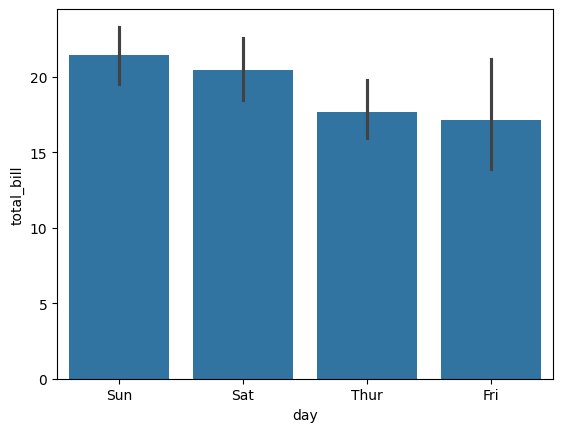

In [67]:
sns.barplot(data=df, x="day", y="total_bill")

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

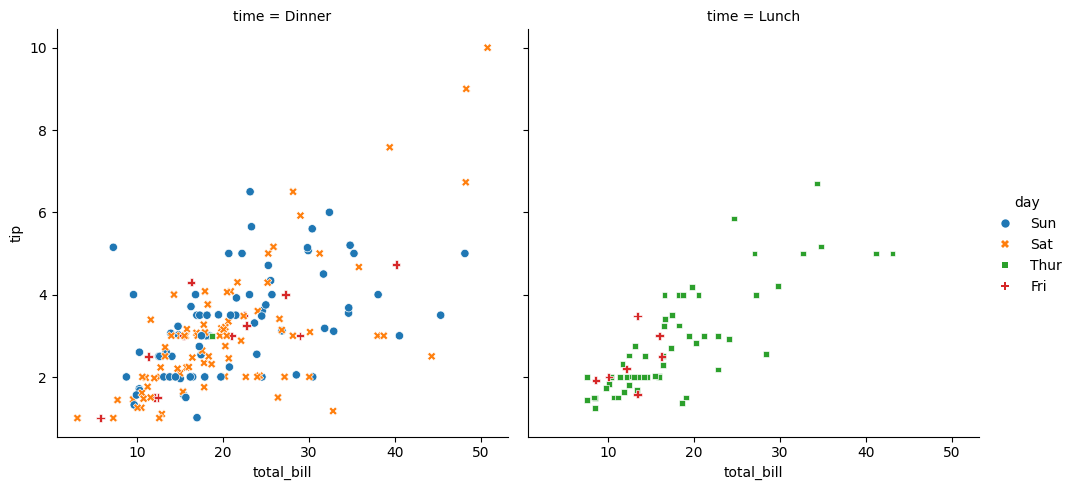

In [66]:
sns.relplot(
    data=df, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
)

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.